[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


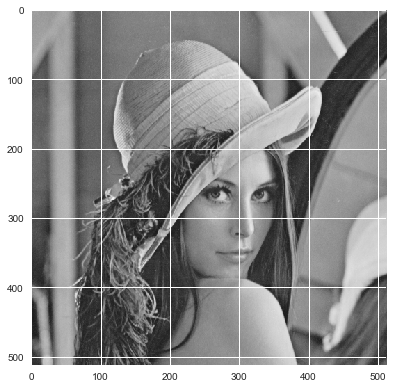

In [63]:
from skimage import io
lena = io.imread("lena.bmp")
io.imshow(lena)

lena.shape
print(lena)

In [65]:
import numpy as np
pix_count = np.zeros((256,), dtype=int)
for i in lena:
    for j in i:
        pix_count[j] += 1
pix_count = list(pix_count)    

In [68]:
def transform(pix_count):
    size = 512
    t_function = []
    SUM = 0
    for i in range(len(pix_count)):
        SUM += pix_count[i]
        t_function.append(int(round(255 * SUM / (size * size), 0)))
    return t_function
s = transform(pix_count)
equalized_pix_count = np.zeros((256,), dtype=int)

lena_equalized = lena.copy()
for i in range(len(lena_equalized)):
    for j in range(len(lena_equalized[i])):
        lena_equalized[i][j] = s[lena_equalized[i][j]]
        equalized_pix_count[lena_equalized[i][j]] += 1
        
io.imshow(lena_equalized)
io.imsave("lena_equalized.png", lena_equalized)

equalized_pix_count = list(equalized_pix_count)

TypeError: only integer scalar arrays can be converted to a scalar index

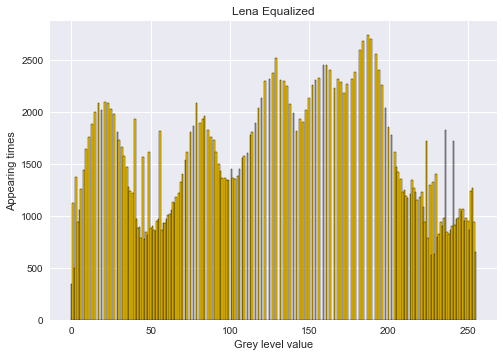

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
name = "equalized_histogram"
mpl.style.use('seaborn')
plt.bar(range(len(equalized_pix_count)), equalized_pix_count, color = '#FFCD00', edgecolor='#000000', width=1.0, lw=0.4)
plt.title("Lena Equalized")
plt.xlabel("Grey level value")
plt.ylabel("Appearing times")
fig = plt.gcf()
plt.savefig(name + '.png', dpi=150)
# plt.gcf().clear()